In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Feature Engineering:

In the following cells, we will engineer / pre-process the variables. We will engineer the variables so that we tackle:

* Duplicate check
* Missing values
* Temporal variables
* Standarise the values of all variables to the same range (Standardization)
* Encoding of Categorical variables
* Forming new meaningful features if needed
* Dropping redundant columns
* Multi-Colinearity check and removal
* Outlier check and removal


### Import necessary libraries:

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as mt
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import re
%matplotlib inline
pd.set_option('display.max_columns',None)
warnings.simplefilter(action='ignore')

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import xgboost

from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
%matplotlib inline
pd.set_option('display.max_columns',None)
warnings.filterwarnings(action='ignore')

In [5]:
df_train = pd.read_csv('/content/drive/MyDrive/PHD-Practice/mith_train_initial_dataset.csv')
df_train_copy = df_train.copy()
df_train.shape

(16810, 19)

In [6]:
df_train.head(10)

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,PropertyEvaluationvalue,year_evaluation
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,540000,2014
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,750000,2014
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,470000,2014
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,570000,2014
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,640000,2015
5,PR11106,1,NY,BATHGATE,3825 3RD AVENUE,10457,2912,26,14 RENTALS - 4-10 UNIT,4,1,5,2000,5940,2007,2,S4,1350000,2015
6,PR11107,1,NY,BATHGATE,476 EAST 186 STREET,10458,3039,159,02 TWO FAMILY DWELLINGS,2,0,2,2033,2400,1993,1,B1,400000,2014
7,PR11108,1,NY,BATHGATE,559 CLAREMONT PARKWAY,10457,2929,128,02 TWO FAMILY DWELLINGS,2,0,2,2361,2394,1991,1,B1,514216,2015
8,PR11109,1,NY,BATHGATE,3864 3RD AVENUE,10457,2929,119,02 TWO FAMILY DWELLINGS,2,0,2,2432,2394,1991,1,B1,679000,2014
9,PR11110,1,NY,BATHGATE,1941 WASHINGTON AVENUE,10457,3034,137,02 TWO FAMILY DWELLINGS,2,0,2,2663,3204,1991,1,B1,520000,2014


In [7]:
df_test = pd.read_csv('/content/drive/MyDrive/PHD-Practice/mith_test_initial_dataset.csv')
df_test_copy = df_test.copy()
df_test.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,year_evaluation
0,PR51101,1,NY,BATHGATE,3860 3 AVENUE,10457,2929,117,02 TWO FAMILY HOMES,2,0,2,2498,2394,1995,1,B1,2013
1,PR51102,1,NY,BATHGATE,455 E. 179TH STREET,10457,3036,65,02 TWO FAMILY DWELLINGS,2,0,2,2033,2340,1994,1,B1,2014
2,PR51103,1,NY,BATHGATE,4415 3 AVENUE,10457,3048,51,14 RENTALS - 4-10 UNIT,4,1,5,2500,6000,1963,2,S4,2015
3,PR51104,1,NY,BATHGATE,407 EAST 174 STREET,10457,2899,34,30 WAREHOUSES,0,1,1,3439,3320,1951,4,E1,2015
4,PR51105,1,NY,EAST TREMONT,2175 CROTONA AVENUE,10457,3083,40,03 THREE FAMILY DWELLINGS,3,0,3,1348,2931,1997,1,C0,2014


In [8]:
sub=pd.read_csv('/content/drive/MyDrive/PHD-Practice/mith_test_initial_dataset.csv')
for i in sub.columns:
    if i != 'PropertyID':
        del sub[i]
sub['PropertyEvaluationvalue'] = -1
del sub['PropertyEvaluationvalue']

In [9]:
#df_test['PropertyEvaluationvalue'] = 0
#append test to train for feature creation
#full=df_train.append(df_test)
#full=full.reset_index()
#full=full.drop('PropertyId',axis=1)
#print(full.shape)

### Duplicate entry check and removal:

In [10]:
duplicate_train = df_train[df_train.duplicated('PropertyID')]
duplicate_train.shape

(0, 19)

In [11]:
duplicate_test = df_test[df_test.duplicated('PropertyID')]
duplicate_test.shape

(0, 18)

In [12]:
df_train.columns

Index(['PropertyID', 'Borough', 'State', 'Surroundings', 'Address', 'ZipCode',
       'Block', 'Lot', 'BldgClassCategory', 'NoOfResidentialUnits',
       'NoOfCommercialUnits', 'TotalNoOfUnits', 'LandAreaInSqFt',
       'GrossAreaInSqFt', 'YearOfConstruction', 'TaxClass_AtEvaluationTime',
       'BldgClass_AtEvaluationTime', 'PropertyEvaluationvalue',
       'year_evaluation'],
      dtype='object')

In [13]:
df_test.columns

Index(['PropertyID', 'Borough', 'State', 'Surroundings', 'Address', 'ZipCode',
       'Block', 'Lot', 'BldgClassCategory', 'NoOfResidentialUnits',
       'NoOfCommercialUnits', 'TotalNoOfUnits', 'LandAreaInSqFt',
       'GrossAreaInSqFt', 'YearOfConstruction', 'TaxClass_AtEvaluationTime',
       'BldgClass_AtEvaluationTime', 'year_evaluation'],
      dtype='object')

In [14]:
df_train.dtypes

PropertyID                    object
Borough                        int64
State                         object
Surroundings                  object
Address                       object
ZipCode                        int64
Block                          int64
Lot                            int64
BldgClassCategory             object
NoOfResidentialUnits           int64
NoOfCommercialUnits            int64
TotalNoOfUnits                 int64
LandAreaInSqFt                 int64
GrossAreaInSqFt                int64
YearOfConstruction             int64
TaxClass_AtEvaluationTime      int64
BldgClass_AtEvaluationTime    object
PropertyEvaluationvalue        int64
year_evaluation                int64
dtype: object

In [15]:
df_train=df_train.set_index('PropertyID')
df_test=df_test.set_index('PropertyID')

In [16]:
df_train['ageofproperty'] = df_train['year_evaluation'] - df_train['YearOfConstruction']
df_train=df_train.drop(columns=['year_evaluation','YearOfConstruction','State','Address','Block','Lot','Surroundings'])
df_test['ageofproperty'] = df_test['year_evaluation'] - df_test['YearOfConstruction']
df_test=df_test.drop(columns=['year_evaluation','YearOfConstruction','State','Address','Block','Lot','Surroundings'])

In [17]:
brand_dictionary = ['A', 'B', 'C', 'D', 'R', 'S', 'H', 'K', 'L', 'O', 'E', 'F','G','T','U','V','I','J','M','N','P','Q','W','Y','Z']
def match_dictionary(string, dictionary):
    for brand in dictionary:
        if(re.search(brand, string, re.IGNORECASE)):
            return brand
    return "Other"

In [18]:
df_train['bldg_class'] = df_train['BldgClass_AtEvaluationTime'].apply(lambda x: match_dictionary(x, brand_dictionary))
df_train=df_train.drop(columns=['BldgClass_AtEvaluationTime','BldgClassCategory'])
df_test['bldg_class'] = df_test['BldgClass_AtEvaluationTime'].apply(lambda x: match_dictionary(x, brand_dictionary))
df_test=df_test.drop(columns=['BldgClass_AtEvaluationTime','BldgClassCategory'])

In [19]:
df_train.head()

,Borough,ZipCode,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,TaxClass_AtEvaluationTime,PropertyEvaluationvalue,ageofproperty,bldg_class
PropertyID,,,,,,,,,,,
PR11101,1,10456,2,0,2,1900,2394,1,540000,24,B
PR11102,1,10457,3,0,3,1687,3037,1,750000,12,C
PR11103,1,10457,2,0,2,2000,2400,1,470000,25,B
PR11104,1,10457,2,0,2,2356,2394,1,570000,23,B
PR11105,1,10457,2,0,2,3346,2308,1,640000,22,B


In [20]:
df_train['Borough'] = df_train['Borough'].astype(str)
df_test['Borough'] = df_test['Borough'].astype(str)
df_train['TaxClass_AtEvaluationTime'] = df_train['TaxClass_AtEvaluationTime'].astype(str)
df_test['TaxClass_AtEvaluationTime'] = df_test['TaxClass_AtEvaluationTime'].astype(str)

In [21]:
zipprice=df_train.groupby('ZipCode')['PropertyEvaluationvalue'].mean()
# target encoding using zipcode column
df_train['ZipCode'] = df_train['ZipCode'].map(zipprice)
# target encoding using zipcode column
df_test['ZipCode'] = df_test['ZipCode'].map(zipprice)

In [22]:
cat_vars = [var for var in df_train.columns if df_train[var].dtypes=='O']
cat_vars

['Borough', 'TaxClass_AtEvaluationTime', 'bldg_class']

In [23]:
df_train.shape

(16810, 11)

In [24]:
def encode_categorical_variables(df_train, cat_vars):
    print('##### Performing Label Encoding on Categorical Variables #####')
    print('Categorical variables: ', cat_vars)
    for i in range(len(cat_vars)):
        var = cat_vars[i]
        var_le = LabelEncoder()
        var_labels = var_le.fit_transform(df_train[var])
        var_mappings = {index: label for index, label in enumerate(var_le.classes_)}
        df_train[(var + '_labels')] = var_labels
        df_train.drop(columns=var, axis=1, inplace=True)
    return df_train

df_train = encode_categorical_variables(df_train, cat_vars)
df_test = encode_categorical_variables(df_test, cat_vars)

##### Performing Label Encoding on Categorical Variables #####
Categorical variables:  ['Borough', 'TaxClass_AtEvaluationTime', 'bldg_class']
##### Performing Label Encoding on Categorical Variables #####
Categorical variables:  ['Borough', 'TaxClass_AtEvaluationTime', 'bldg_class']


In [25]:
z = np.abs(stats.zscore(df_train))
no_out_df_train = df_train[(z<3).all(axis=1)]
no_out_df_train.shape

(15294, 11)

In [26]:
no_out_df_train

,ZipCode,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,PropertyEvaluationvalue,ageofproperty,Borough_labels,TaxClass_AtEvaluationTime_labels,bldg_class_labels
PropertyID,,,,,,,,,,,
PR11101,6.474823e+05,2,0,2,1900,2394,540000,24,0,0,1
PR11102,8.920597e+05,3,0,3,1687,3037,750000,12,0,0,2
PR11103,8.920597e+05,2,0,2,2000,2400,470000,25,0,0,1
PR11104,8.920597e+05,2,0,2,2356,2394,570000,23,0,0,1
PR11105,8.920597e+05,2,0,2,3346,2308,640000,22,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
PR27878,1.236902e+06,1,0,1,3055,1084,915000,35,3,1,15
PR27879,1.236902e+06,1,0,1,2465,1320,1900000,12,3,1,15
PR27880,1.236902e+06,1,0,1,17280,773,988000,62,3,1,15


In [27]:
no_out_df_train.corr()

,ZipCode,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,PropertyEvaluationvalue,ageofproperty,Borough_labels,TaxClass_AtEvaluationTime_labels,bldg_class_labels
ZipCode,1.000000,0.058741,0.075928,0.066229,0.112433,-0.008203,0.542277,-0.185436,0.124228,0.582757,0.544844
NoOfResidentialUnits,0.058741,1.000000,0.167629,0.993034,-0.119489,0.701917,0.210496,-0.101536,-0.065720,0.018495,-0.081747
NoOfCommercialUnits,0.075928,0.167629,1.000000,0.282620,-0.020640,0.222057,0.152985,-0.005702,0.003542,0.092976,0.233631
TotalNoOfUnits,0.066229,0.993034,0.282620,1.000000,-0.118729,0.709504,0.223097,-0.099476,-0.063522,0.029107,-0.051617
LandAreaInSqFt,0.112433,-0.119489,-0.020640,-0.118729,1.000000,-0.132675,0.057513,-0.056347,0.013012,0.315693,0.508747
GrossAreaInSqFt,-0.008203,0.701917,0.222057,0.709504,-0.132675,1.000000,0.313990,-0.152365,-0.105161,-0.150906,-0.210849
PropertyEvaluationvalue,0.542277,0.210496,0.152985,0.223097,0.057513,0.313990,1.000000,-0.119523,0.106590,0.315861,0.270940
ageofproperty,-0.185436,-0.101536,-0.005702,-0.099476,-0.056347,-0.152365,-0.119523,1.000000,0.191040,-0.353474,-0.368981
Borough_labels,0.124228,-0.065720,0.003542,-0.063522,0.013012,-0.105161,0.106590,0.191040,1.000000,0.024885,-0.022601
TaxClass_AtEvaluationTime_labels,0.582757,0.018495,0.092976,0.029107,0.315693,-0.150906,0.315861,-0.353474,0.024885,1.000000,0.833093


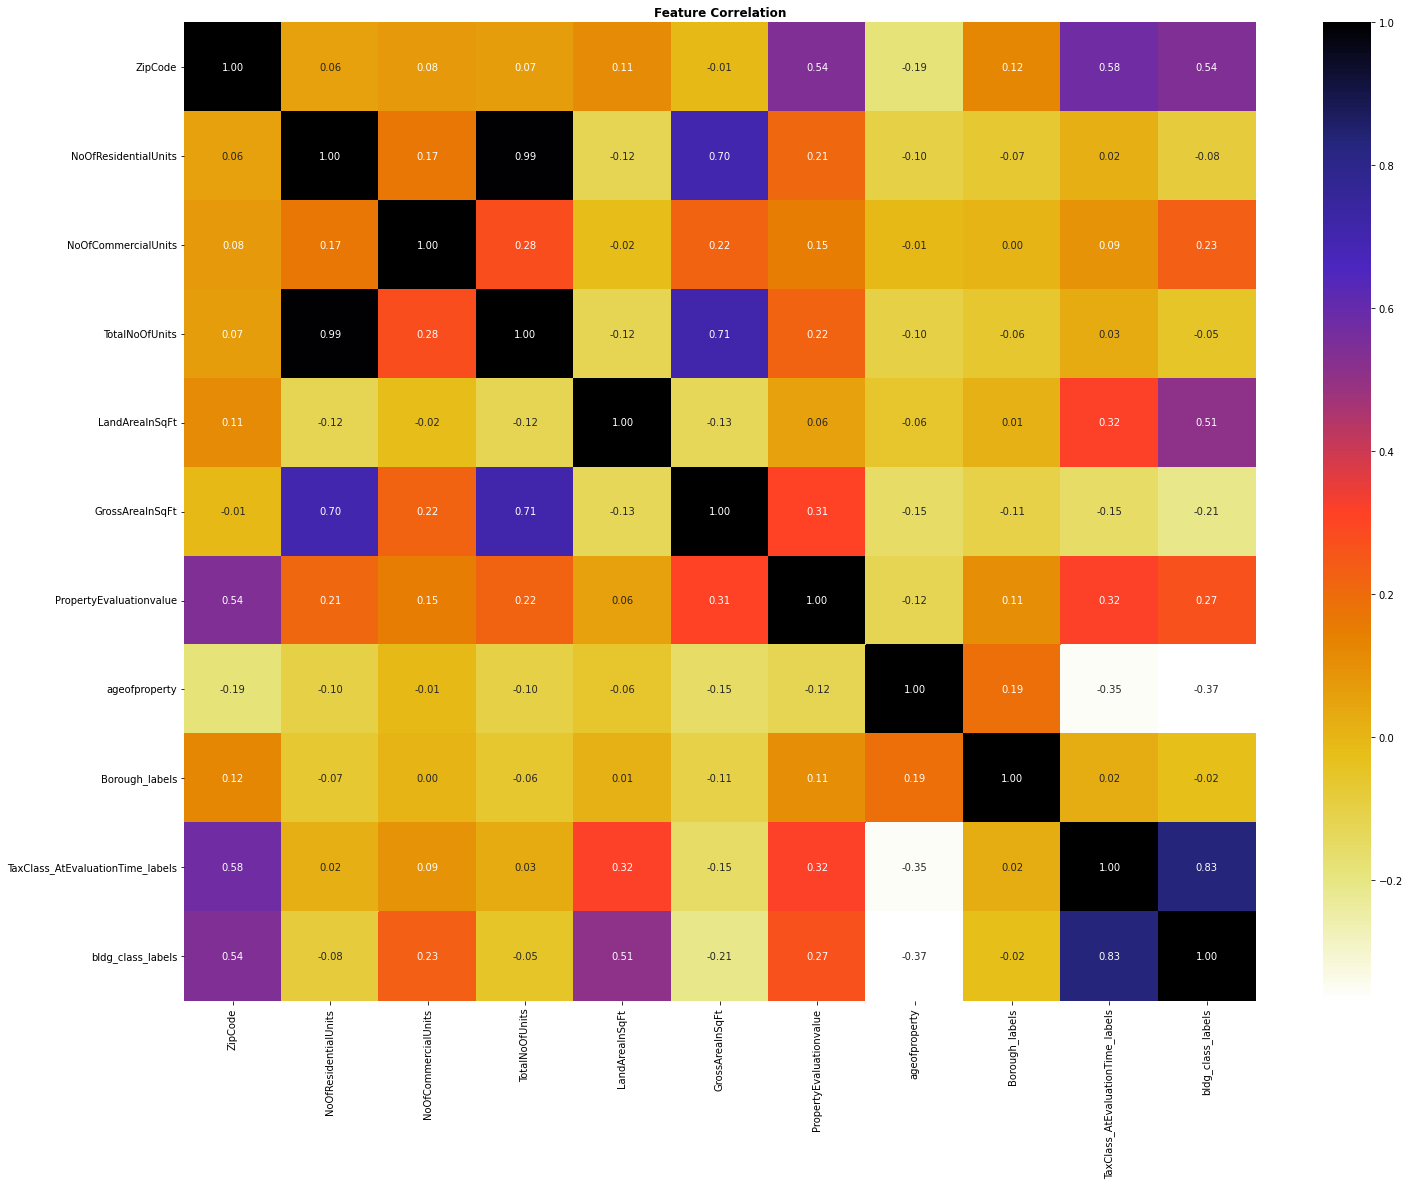

In [28]:
plt.subplots(1,1,figsize=(24, 18))
sns.heatmap(no_out_df_train.corr(), annot=True, fmt='.2f', cmap="CMRmap_r")
plt.title("Feature Correlation", fontweight='bold');


In [29]:
num_vars = [var for var in no_out_df_train.columns if no_out_df_train[var].dtypes!= 'O']
print("Total no of numerical variables in the dataset: ", len(num_vars))

Total no of numerical variables in the dataset:  11


In [30]:
X = df_train.drop('PropertyEvaluationvalue', axis=1)
y = df_train['PropertyEvaluationvalue']
new_df = df_train.copy()
X.shape, y.shape

((16810, 10), (16810,))

### Train-Test split:

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 100)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12607, 10), (12607,), (4203, 10), (4203,))

### Feature Scaling:

In [32]:
train_vars = [var for var in X_train.columns if var not in ['PropertyID,PropertyEvaluationvalue']]
len(train_vars)

10

In [33]:
scaler = StandardScaler()

scaler.fit(X_train[train_vars]) 

X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

In [34]:
X_train.head()

,ZipCode,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,ageofproperty,Borough_labels,TaxClass_AtEvaluationTime_labels,bldg_class_labels
PropertyID,,,,,,,,,,
PR14293,-0.602608,0.019632,-0.057505,0.001330,-0.141581,-0.104973,0.729939,-1.748808,-0.446888,-0.403900
PR21855,0.183096,-0.110633,-0.057505,-0.121017,-0.056449,-0.100131,1.025553,1.109549,-0.446888,-0.587745
PR19953,0.562619,0.019632,-0.057505,0.001330,-0.112260,-0.049460,0.729939,-1.034219,-0.446888,-0.403900
PR15599,1.793530,0.019632,-0.057505,0.001330,-0.135201,-0.125702,0.983323,1.109549,-0.446888,-0.403900
PR24842,0.766469,-0.110633,-0.057505,-0.121017,-0.105880,-0.134620,0.518786,1.109549,-0.446888,-0.587745


In [35]:
# function for calculating the rmse and mape
from sklearn import metrics
def mape(train_actual,train_prediction,test_actual,test_prediction):
    print('train')
    print('mape: ',np.mean(np.abs((train_actual-train_prediction)/train_actual)*100))
    print('test')
    print('mape: ',np.mean(np.abs((test_actual-test_prediction)/test_actual)*100))

### Linear Regression Model:

In [37]:
linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

LinearRegression()

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [39]:
mape(y_train,lm.predict(X_train),y_test,lm.predict(X_test))

train
mape:  58.105592005775826
test
mape:  56.895642034060224


### Elastic Net Model:

In [40]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [41]:
mape(y_train,lm.predict(X_train),y_test,elastic_net.predict(X_test))

train
mape:  58.105592005775826
test
mape:  57.04740288076655


### Ridge Regression Model:

In [42]:
ridge_reg = Ridge(alpha=1, solver='cholesky')

ridge_reg.fit(X_train, y_train)

Ridge(alpha=1, solver='cholesky')

In [43]:
mape(y_train,lm.predict(X_train),y_test,ridge_reg.predict(X_test))

train
mape:  58.105592005775826
test
mape:  56.987879022232256


### Lasso Regression Model:

In [44]:
lasso_reg = Lasso(alpha=0.1)

lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [45]:
mape(y_train,lm.predict(X_train),y_test,lasso_reg.predict(X_test))

train
mape:  58.105592005775826
test
mape:  56.987975748004885


### XG Boost Regression Model:

In [46]:
xgb_reg = xgboost.XGBRegressor()

xgb_reg.fit(X_train, y_train)

[07:17:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [47]:
mape(y_train,lm.predict(X_train),y_test,xgb_reg.predict(X_test))

train
mape:  58.105592005775826
test
mape:  40.237662705531484


### Ada Boost Regression Model:

In [48]:
adaboost_reg = AdaBoostRegressor()

adaboost_reg.fit(X_train, y_train)

AdaBoostRegressor()

In [49]:
mape(y_train,lm.predict(X_train),y_test,adaboost_reg.predict(X_test))

train
mape:  58.105592005775826
test
mape:  75.17864332020577


### Gradient Boosting Regression Model:

In [50]:
gb_reg = GradientBoostingRegressor()

gb_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [51]:
mape(y_train,lm.predict(X_train),y_test,gb_reg.predict(X_test))

train
mape:  58.105592005775826
test
mape:  40.55546950756463


### Decision Tree Regressor:

In [52]:
tree_reg = DecisionTreeRegressor(max_depth=5)

tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [53]:
mape(y_train,lm.predict(X_train),y_test,tree_reg.predict(X_test))

train
mape:  58.105592005775826
test
mape:  44.703867212100754


### Random Forest Regression Model:

In [54]:
forest_reg = RandomForestRegressor(n_estimators= 500, max_depth=6)

forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=500)

In [55]:
mape(y_train,lm.predict(X_train),y_test,forest_reg.predict(X_test))

train
mape:  58.105592005775826
test
mape:  40.816550061850506


In [56]:
scores = cross_val_score(forest_reg, 
                         X_train, 
                         y_train, 
                         scoring="neg_mean_squared_error", 
                         cv = 5)

In [57]:
forest_reg_rmse_scores_1 = np.expm1(-scores)
forest_reg_rmse_scores_1

array([565258.9970591 , 571275.34770951, 555717.4141373 , 492367.11102531,
       480403.07997468])

In [58]:
forest_reg_rmse_scores = np.sqrt(-scores)
forest_reg_rmse_scores

array([565258.9970591 , 571275.34770951, 555717.4141373 , 492367.11102531,
       480403.07997468])

In [59]:
param_grid = [
    {'n_estimators': [300, 400, 500], 'max_features': [2, 4, 6]},
    {'bootstrap': [False], 'n_estimators': [300, 400, 500], 'max_features': [2, 4, 6]}
]

forest_regressor = RandomForestRegressor()

grid_search = GridSearchCV(forest_regressor, 
                           param_grid, 
                           scoring='neg_mean_absolute_percentage_error',
                           return_train_score=True,
                           cv=3)


In [60]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6],
                          'n_estimators': [300, 400, 500]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6],
                          'n_estimators': [300, 400, 500]}],
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

In [61]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 500}

In [62]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=500)

In [63]:
final_predictor = grid_search.best_estimator_
final_predictor.fit(X_train, y_train)
final_pred = final_predictor.predict(X_test)

In [64]:
mape(y_train,lm.predict(X_train),y_test,final_predictor.predict(X_test))

train
mape:  58.105592005775826
test
mape:  34.3074800542146


In [65]:
feature_importances = grid_search.best_estimator_.feature_importances_

attrs = list(df_train.select_dtypes(include = ['float64','int64']))

sorted(zip(attrs, feature_importances), reverse=True)

[('ageofproperty', 0.027143878320569477),
 ('ZipCode', 0.24005594124954918),
 ('TotalNoOfUnits', 0.03998833910958931),
 ('TaxClass_AtEvaluationTime_labels', 0.044509031386206016),
 ('PropertyEvaluationvalue', 0.08098215578271183),
 ('NoOfResidentialUnits', 0.03214038418684857),
 ('NoOfCommercialUnits', 0.02953500630537295),
 ('LandAreaInSqFt', 0.11487324079417388),
 ('GrossAreaInSqFt', 0.3131578281540914),
 ('Borough_labels', 0.07761419471088751)]

In [67]:
#model_pred = pd.DataFrame({'PropertyID':X_test.PropertyID, 'PropertyEvaluationvalue':final_pred})
#model_pred.to_csv('model-predictions.csv',index=False)
#model_pred.head()